## <b>■ 데이터 정규화 : 데이터 프레임 열에 들어있는 숫자를 0-1사이의 숫자로 변환</b>
    A, B 변수에서 A의 변수가 큰 숫자값을 갖기 때문에 A 변수의 영향력이 더 커진다. 
    따라서 min/max 정규화를 써서 0-1 사이의 범위로 만들어 준다.
    
$$min　/　max　정규화 공식 = {{x-min(x)}\over {max(x)-min(x)}}$$

### ※ 문제169. df 데이터프레임의 horsepower 데이터를 min/max 정규화 하시오

In [ ]:
min_x = df.horsepower - df.horsepwer.min()
min_max = df.horsepower.max() - df.horsepower.min()
df.horsepower = min_x / min_max
df.horsepower.head(), df.horsepower.describe()

#### <b>표준화와 정규화 두가지 중에 머신러닝 학습이 잘되는 경우가 정규화여서 대체적으로 딥러닝과 머신러닝 학습 시에는 min/max 정규화를 사용</b>

### ※ 문제170. 다시 uci 자동차 연비 데이터를 로드하고 이번에는 horsepower를 표준화하시오
    표준화 : 평균이 0, 표준편차 1로 하는 데이터로 변경
    정규화 : 0-1 사이의 숫자로 데이터를 변경하는 것
    
    표준화 및 정규화 작업을 하게 되면 이상치에 영향을 덜 받게 된다.

In [4]:
import pandas as pd
df = pd.read_csv("prac/auto-mpg.csv")
df.columns= ['mpg','cylinders','displacement','horsepower','weight','acceleration','medel year','origin','name']

import  numpy  as  np 
df.horsepower.replace("?", np.nan,  inplace=True)
df.dropna( subset=["horsepower"], axis=0, inplace=True)
df['horsepower']=df['horsepower'].astype('float')

import pandas as pd    
from sklearn.preprocessing import StandardScaler

features = ["horsepower"] # 표준화 하고 싶은 column들을 입력
autoscaler = StandardScaler()
df[features] = autoscaler.fit_transform(df[features])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,medel year,origin,name
0,15.0,8,350.0,1.575170,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,1.185250,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,1.185250,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,0.925303,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,2.432994,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,-0.478408,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,-1.362226,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,-0.530397,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,-0.660371,2625.0,18.6,82,1,ford ranger


### <b>■ 시계열 데이터</b>
    일정 시간 간격으로 배치된 데이터들의 수열
    시계열 해석이라고 하는 것은 이런 시계열을 해석하고 이해하는데 쓰이는 여러가지 방법을 연구하는 분야
    시계열 예측이라고 하는 것은 주어진 시계열을 보고 수학적인 모델을 만들어서 일어날 것들을 예측하는 것
    일반적으로 이런 방법들은 공학이나 과학계산, 혹은 금융시장에서의 주가예측 등에서 많이 사용
    주식, 환율 등 금융 데이터를 다루기 위해 개발된 Pandas는 시계열 데이터를 다루는 유용한 기능을 제공
    
#### <b>■ 시계열 데이터로 예측하기 실습</b>
    미국의 항공 데이터의 우러별 승객수 데이터를 이용해서 미래의 날짜의 승객수를 예측하는 실습

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib 패키지 한글 설정 시작
# from matplotlib import rc
# rc('font', family='Malgun Gothic') 
#matplotlib 패키지 한글 설정 끝

# 1. 데이터 로드
df = pd.read_csv('https://raw.githubusercontent.com/ivanarielcaceres/timeseries-lstm-keras/master/data/international-airline-passengers.csv')

#2. 데이터 분석
print(df.head())
print(df.tail())
print(df.info())

     Month  Passengers
0  1949-01       112.0
1  1949-02       118.0
2  1949-03       132.0
3  1949-04       129.0
4  1949-05       121.0
                                                 Month  Passengers
141                                            1960-10       461.0
142                                            1960-11       390.0
143                                            1960-12       432.0
144                                                NaN         NaN
145  International airline passengers: monthly tota...         NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       145 non-null    object 
 1   Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB
None


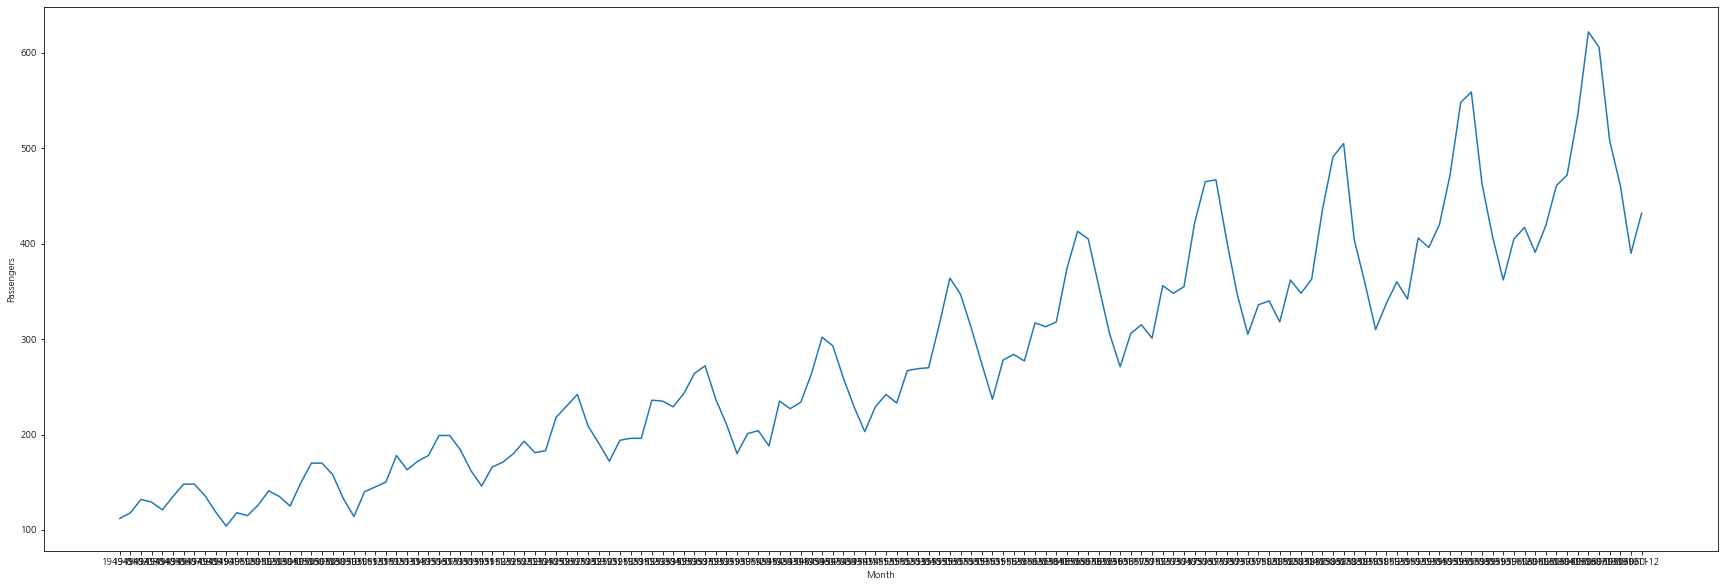

In [7]:
#3. 시각화 하기 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10) # (가로, 세로)
plt.rcParams.update({'font.size': 9}) # 글자 크기

sns.lineplot(x='Month', y='Passengers', data=df)
plt.show()

In [8]:
# 4.  결측치를 제거합니다.
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

# df = pd.read_csv('https://raw.githubusercontent.com/ivanarielcaceres/timeseries-lstm-keras/master/data/international-airline-passengers.csv')
# print(df)

df = df.dropna()
print(df)

                                                 Month  Passengers
0                                              1949-01       112.0
1                                              1949-02       118.0
2                                              1949-03       132.0
3                                              1949-04       129.0
4                                              1949-05       121.0
..                                                 ...         ...
141                                            1960-10       461.0
142                                            1960-11       390.0
143                                            1960-12       432.0
144                                                NaN         NaN
145  International airline passengers: monthly tota...         NaN

[146 rows x 2 columns]
       Month  Passengers
0    1949-01       112.0
1    1949-02       118.0
2    1949-03       132.0
3    1949-04       129.0
4    1949-05       121.0
..       ...         .

In [9]:
# 5. 연도와 달에 대한 컬럼을 만들어서 행 인덱스로 지정합니다. 
df['Month'] = pd.to_datetime(df.Month, format='%Y-%m') # 날짜형으로 변환
df = df.set_index('Month') # 행 index로 지정
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [10]:
# 6. 모델을 생성합니다.
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

order = (2, 1, 2)

#model = ARIMA(df, order, freq='D')

model = ARIMA(df, order)
fit = model.fit()
#print(fit.summary())

C:\Users\knitwill\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\knitwill\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


    ※ order = (2, 1, 2) 이란 ?   한번 차분하고 acf 가 2 시점에서 끊기고 pacf 도 2 시점에서 끊긴 모델 
       order = (pacf 끊긴것,  한번 차분, acf 가 2시점에서 끊김)
       acf 가 서서히 감소하고 pcf 가 p 시점에서 절단이 되면 ar(p) 라는 모델이라 할 수있다.
       pacf 가 서서히 감소하고 acf 가 p 시점에서 절단이 되면 ma(p) 라는 모델이라 할 수 있다.  
       차분은 평균이 일정하지 않은 시계열 데이터를 평균을 맞추기 위해서 하는 작업을 말한다. 
    안정적인 시계열 예측을 하기위해 차분을 하는데 차분이란 ? http://www.dodomira.com/2016/04/21/arima_in_r/

In [12]:
# 7. 예측을 합니다. 
preds = fit.predict(1, 3000, typ='levels')
print(preds)

# 8. 기간을 주고 예측합니다.
#preds = fit.predict("2001-11-02", "2001-12-15", typ='levels')
#print(preds)

1949-02-01     114.531017
1949-03-01     121.350805
1949-04-01     137.221162
1949-05-01     129.789184
1949-06-01     119.169305
                 ...     
2198-09-01    7714.723051
2198-10-01    7717.254068
2198-11-01    7719.785084
2198-12-01    7722.316101
2199-01-01    7724.847118
Freq: MS, Length: 3000, dtype: float64


#### 주식 데이터 시계열 분석 실습

In [22]:
import pandas as pd

df = pd.read_csv('prac/stock-data.csv')
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


(         Date  Close  Start   High    Low  Volume
 0  2018-07-02  10100  10850  10900  10000  137977
 1  2018-06-29  10700  10550  10900   9990  170253
 2  2018-06-28  10400  10900  10950  10150  155769
 3  2018-06-27  10900  10800  11050  10500  133548
 4  2018-06-26  10800  10900  11000  10700   63039,
 None)

    Date 컬럼이 Object(문자열)이므로 시계열 분석을 할 수가 없다. 따라서 Date 컬럼을 `to_datetime()`을 이용하여 timestamp 객체로 변경한다.

In [23]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


    위와 같이 datetime으로 변경이 되면 시간 순거에 맞춰 데이터를 검색하기가 편해진다.
    시계열 컬럼을 row index로 지정하면 시간 순서에 맞춰 indexing 또는 슬라이싱 하기가 편해진다.

### ※ 문제171. 기존의 Date column을 삭제하시오

In [24]:
df.drop('Date',axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Close     20 non-null     int64         
 1   Start     20 non-null     int64         
 2   High      20 non-null     int64         
 3   Low       20 non-null     int64         
 4   Volume    20 non-null     int64         
 5   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.1 KB


### ※ 문제172. 새로운 column인 new_Date를 행 index로 지정하시오

In [25]:
df.set_index('new_Date',inplace=True)
df.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


### ※ 문제173. 위의 new_Date 시계열 데이터를 이용해서 파생변수 3개를 생성하시오
    연도만 있는 Year, 월만 있는 Month, 일만 있는 Day를 생성하시오

In [27]:
df['Year'] = df['new_Date'].dt.year
df.Year

KeyError: 'new_Date'